In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, PolynomialFeatures
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neural_network import MLPClassifier

# Import dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/g colab/osteoporosis.csv', index_col=['Id'])
df.head()

,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
Id,,,,,,,,,,,,,,,
104866,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
101999,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,None,None,None,Yes,1
106567,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
102316,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,None,Rheumatoid Arthritis,Corticosteroids,No,1
101944,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,None,Rheumatoid Arthritis,None,Yes,1


# Analyze the data

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 22.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 71.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 31.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 30.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-4-d324dadd6bfe>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will 

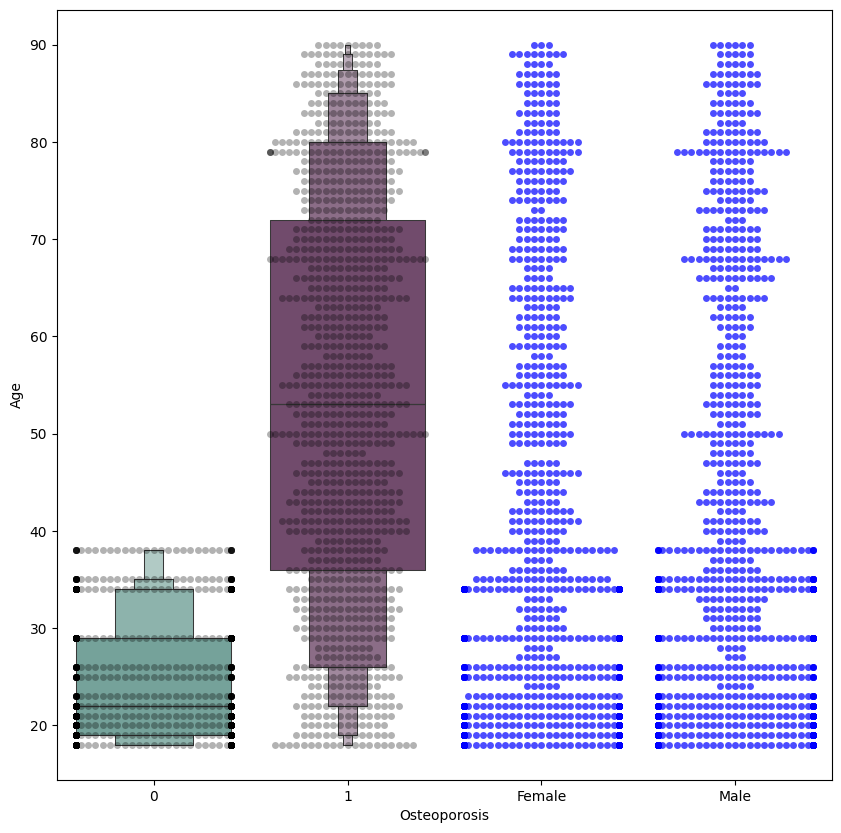

In [ ]:
cols = ["#6daa9f","#774571"]
feature = ["Age"]
for i in feature:
    plt.figure(figsize=(10,10))
    sns.swarmplot(x=df["Osteoporosis"], y=df[i], color="black", alpha=0.3)
    sns.swarmplot(x=df["Gender"], y=df[i], color="blue", alpha=0.7)
    sns.boxenplot(x=df["Osteoporosis"], y=df[i], palette=cols)
    plt.show()

## use the Code below if you want to use Keras

In [ ]:
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras import callbacks

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
dfOhe = ohe.fit_transform(df[['Gender', 'Hormonal Changes', 'Family History', 'Race/Ethnicity',
       'Body Weight', 'Calcium Intake', 'Vitamin D Intake',
       'Physical Activity', 'Smoking', 'Alcohol Consumption',
       'Medical Conditions', 'Medications', 'Prior Fractures']])
dfOhe['Age'] = df.Age


X = dfOhe
y = df.Osteoporosis

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True)

# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 29))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
from keras.optimizers import SGD
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 600,callbacks=[early_stopping], validation_split=0.2)

Epoch 1/600
40/40 [==============================] - 1s 9ms/step - loss: 0.6931 - accuracy: 0.5064 - val_loss: 0.6930 - val_accuracy: 0.4490
Epoch 2/600
40/40 [==============================] - 0s 3ms/step - loss: 0.6896 - accuracy: 0.6869 - val_loss: 0.6801 - val_accuracy: 0.5510
Epoch 3/600
40/40 [==============================] - 0s 3ms/step - loss: 0.6629 - accuracy: 0.4824 - val_loss: 0.6123 - val_accuracy: 0.5510
Epoch 4/600
40/40 [==============================] - 0s 3ms/step - loss: 0.5953 - accuracy: 0.5423 - val_loss: 0.5295 - val_accuracy: 0.7707
Epoch 5/600
40/40 [==============================] - 0s 3ms/step - loss: 0.5365 - accuracy: 0.7412 - val_loss: 0.4688 - val_accuracy: 0.8408
Epoch 6/600
40/40 [==============================] - 0s 3ms/step - loss: 0.4827 - accuracy: 0.7812 - val_loss: 0.4204 - val_accuracy: 0.8567
Epoch 7/600
40/40 [==============================] - 0s 3ms/step - loss: 0.4273 - accuracy: 0.7955 - val_loss: 0.3719 - val_accuracy: 0.8503
Epoch 8/600
4

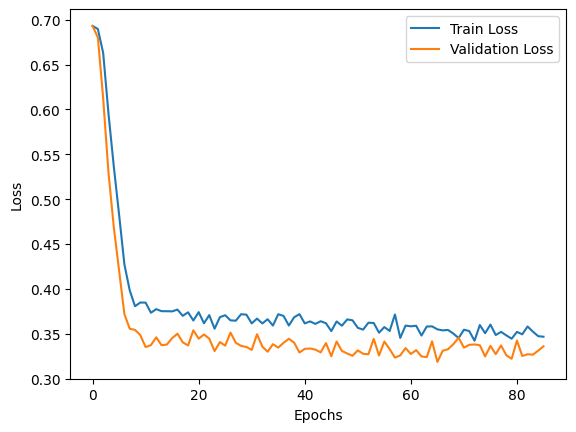

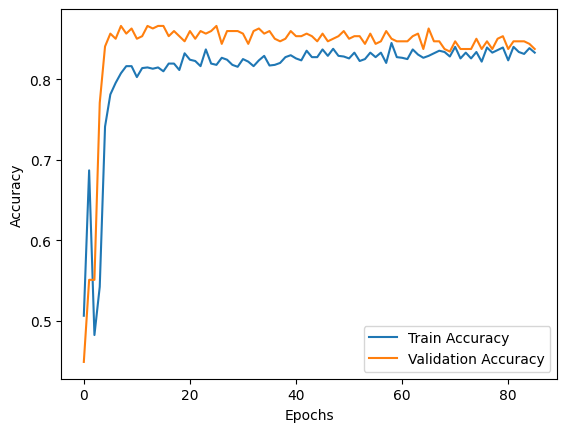

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## use the Code below if you want to use scikit learn


In [ ]:
# Data preprocessing
X = df.drop(columns='Osteoporosis')
y = df.Osteoporosis

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

num_pipe = Pipeline([
    ("scaler", MinMaxScaler()),
    ('poly', PolynomialFeatures())
])

cat_pipe = Pipeline([
    ("onehot", OneHotEncoder()),
    ('poly', PolynomialFeatures())
])

preprocessor = ColumnTransformer([
    ('numeric', num_pipe, ['Age']),
    ('categoric', cat_pipe,['Gender', 'Hormonal Changes', 'Family History', 'Race/Ethnicity',
       'Body Weight', 'Calcium Intake', 'Vitamin D Intake',
       'Physical Activity', 'Smoking', 'Alcohol Consumption',
       'Medical Conditions', 'Medications', 'Prior Fractures']),
])

# Use MLPClassifier if the goal is not numeric
# By default MLPC use 100 neurons and 1 hidden layer
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', MLPClassifier(early_stopping=True))
])

# Tune the parameters
parameter = {
    'prep__numeric__poly__degree': [1, 2, 3],
    'algo__activation': ['tanh', 'relu', 'logistic', 'identity'],
    'algo__solver': ['lbfgs', 'sgd', 'adam'],
    'algo__alpha': [0.0001, 0.001, 0.005],
    'algo__learning_rate_init': [0.0001, 0.001, 0.05, 0.1]
}

# make and use the model
model = RandomizedSearchCV(pipeline, parameter, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'prep__numeric__poly__degree': 2, 'algo__solver': 'sgd', 'algo__learning_rate_init': 0.1, 'algo__alpha': 0.001, 'algo__activation': 'identity'}
0.8505747126436781 0.814176245210728 0.7959183673469388


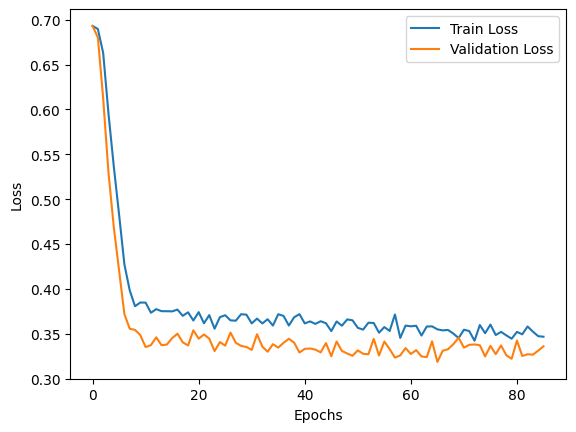

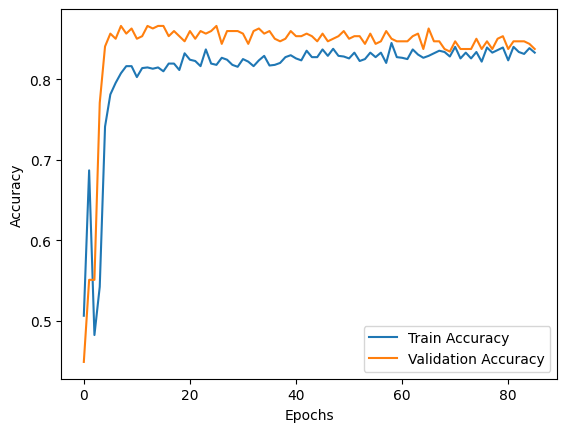

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Feature importance

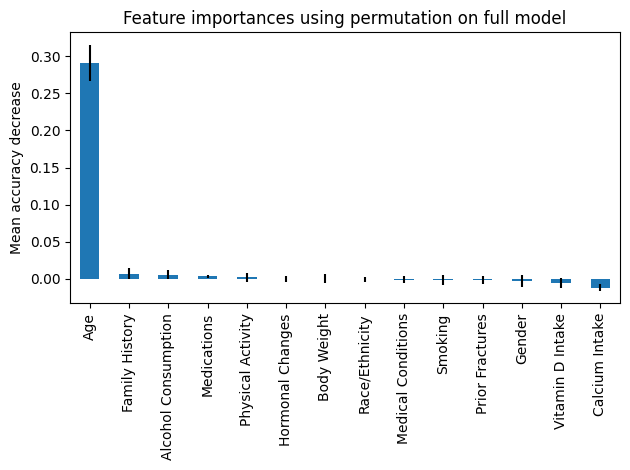

In [ ]:
result = permutation_importance(
    model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1
)

data_importance = pd.Series(result.importances_mean, index=['Age', 'Gender', 'Hormonal Changes', 'Family History', 'Race/Ethnicity',
       'Body Weight', 'Calcium Intake', 'Vitamin D Intake',
       'Physical Activity', 'Smoking', 'Alcohol Consumption',
       'Medical Conditions', 'Medications', 'Prior Fractures'])

fig, ax = plt.subplots()
data_importance.sort_values(ascending=False).plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

### re-select columns and train again if necessary based on feature importance above

In [ ]:
X = df.drop(columns=['Osteoporosis', 'Calcium Intake', 'Hormonal Changes', 'Alcohol Consumption', 'Family History', 'Prior Fractures'])
y = df.Osteoporosis

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1566, 9), (392, 9), (1566,), (392,))

In [ ]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe, ['Age']),
    ('categoric', cat_pipe,['Gender', 'Race/Ethnicity',
       'Body Weight', 'Vitamin D Intake',
       'Physical Activity', 'Smoking',
       'Medical Conditions', 'Medications']),
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', MLPClassifier(early_stopping=True))
])

model = RandomizedSearchCV(pipeline, parameter, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'prep__numeric__poly__degree': 2, 'algo__solver': 'lbfgs', 'algo__learning_rate_init': 0.001, 'algo__alpha': 0.0001, 'algo__activation': 'identity'}
0.855683269476373 0.8397190293742018 0.8112244897959183


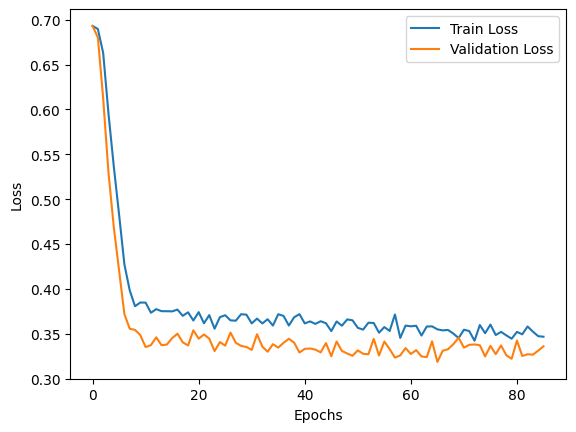

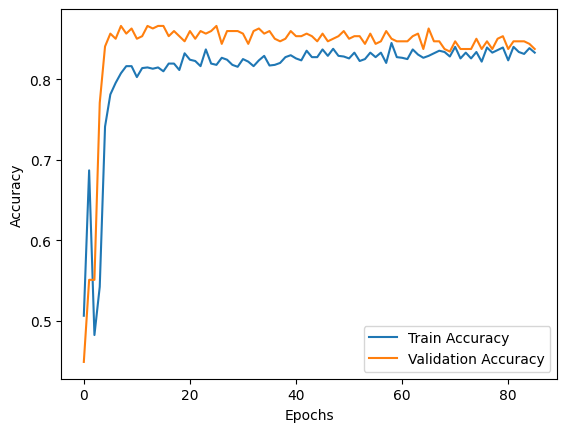

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Plot ROC curve

Text(0, 0.5, 'TPR')

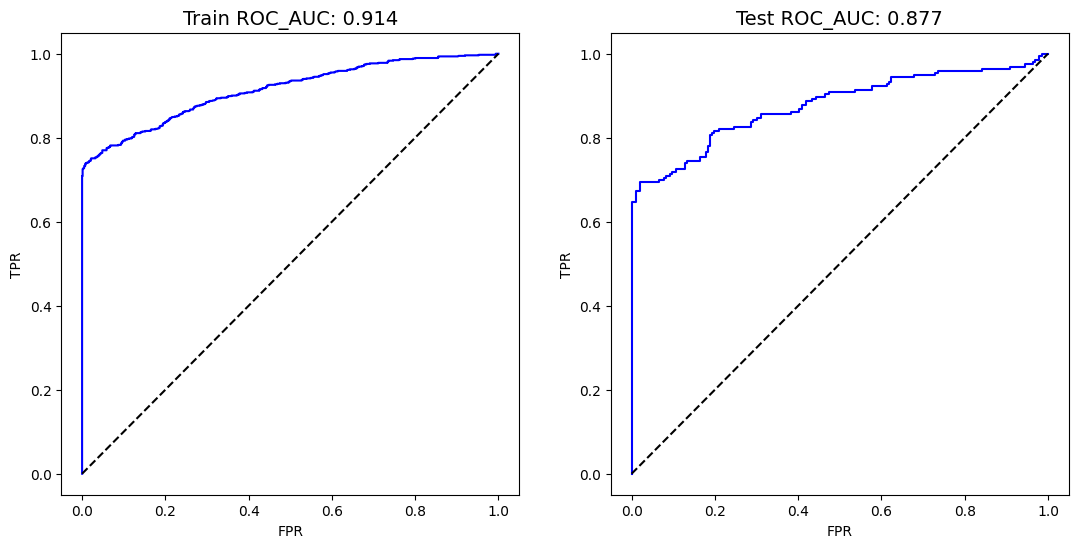

In [ ]:
plt.figure(figsize=(13, 6))

plt.subplot(121)
prob = model.predict_proba(X_train)[:, 1]
fpr, tpr, t_roc = roc_curve(y_train, prob)
plt.plot(fpr, tpr, 'b-')
plt.plot([0, 1], [0, 1], 'k--')
plt.title(f"Train ROC_AUC: {auc(fpr, tpr):.3f}", fontsize=14)
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.xlabel("FPR")
plt.ylabel("TPR")

plt.subplot(122)
prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, t_roc = roc_curve(y_test, prob)
plt.plot(fpr, tpr, 'b-')
plt.plot([0, 1], [0, 1], 'k--')
plt.title(f"Test ROC_AUC: {auc(fpr, tpr):.3f}", fontsize=14)
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.xlabel("FPR")
plt.ylabel("TPR")

# Save the model

In [ ]:
import pickle, os

os.makedirs("Models", exist_ok=True)

filename = "Models/Osteoporosis_ANN.pkl"
pickle.dump(model.best_estimator_, open(filename, "wb"))

# Load the model

In [ ]:
loaded_model = pickle.load(open("Models/Osteoporosis_ANN.pkl", 'rb'))

# Predict use the model

In [ ]:
X_train.iloc[:1]

,Age,Gender,Race/Ethnicity,Body Weight,Vitamin D Intake,Physical Activity,Smoking,Medical Conditions,Medications
Id,,,,,,,,,
104598,25,Female,Caucasian,Normal,Insufficient,Sedentary,No,Hyperthyroidism,Corticosteroids


In [ ]:
X_pred = pd.DataFrame([[54, 'Male', 'Asian', 'Normal', 'Insufficient', 'Sedentary', 'Yes', 'Hyperthyroidism', 'None']], columns=X_train.columns)
X_pred

,Age,Gender,Race/Ethnicity,Body Weight,Vitamin D Intake,Physical Activity,Smoking,Medical Conditions,Medications
0,54,Male,Asian,Normal,Insufficient,Sedentary,Yes,Hyperthyroidism,None


In [ ]:
loaded_model.predict(X_pred)

array([1])